In [20]:
import numpy as np 
import random
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

Question 1:

In [48]:
def f(t, y):
    # y[0]=S, y[1]=I, y[2]=R
    a=2*np.log(2)
    b=np.log(2)
    N=1000
    
    S, I, R = y
        
    return np.array([-(a/N)*I*S, (a/N)*I*S-b*I, b*I])

In [49]:
sol = solve_ivp(f, [0, 20], np.array([999, 1, 0]), max_step = 1)

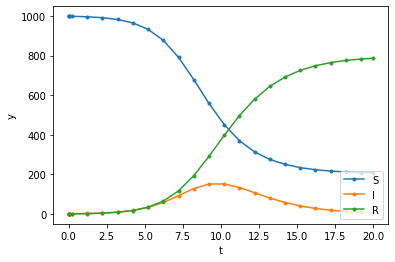

In [52]:
# plot results
plt.figure() 
plt.plot(sol.t, sol.y[0, :], '.-')
plt.plot(sol.t, sol.y[1, :], '.-')
plt.plot(sol.t, sol.y[2, :], '.-')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(["S", "I", "R"], loc ="lower right")

Question 2

In [1]:
def initial1D(s0,i0,r0):
    '''
    sets an initial population vector for the epidemic simulation
    each state subpopulation is appended to the growing vector, pop
    NOTE: if position in the array is important,eg. if you are modeling
    local neighborhood contacts, each individual must be placed 
    randomly in the array
    '''
    
    pop=[]
    for i in range(s0):
        pop.append('s')
    for i in range(i0):
        pop.append('i')
    for i in range(r0):
        pop.append('r')
    return pop

In [4]:
def census1D(pop):
    # counts the number of s, i and r cells in pop
    s=0
    i=0
    r=0
    n=np.array(pop).shape[0]
    for j in range(n):
        if pop[j]=='s':
            s+=1
        elif pop[j]=='i':
            i+=1
        elif pop[j]=='r':
            r+=1
    return s,i,r

In [132]:
def epidemic_simulation(N, a, b, t=[0, 20], t_scale=1000):
    '''
    this stochastic epidemic simulation
    '''
    # initialize population
    pop=initial1D(N-1,1,0)
    a = 2*np.log(2)
    s, i , r = census1D(pop)
    h = np.linspace(t[0], t[1], num=t_scale)
    interval = (t[1] - t[0])/t_scale
    
    tt=[0]
    results=[[s,i,r]]
    for index in range(len(h)):
        # the probability has birth event (at 1 person get infected) over time interval h
        pb = (a/N) * i * interval * s
        # the probability has death event (infect to recover)
        pd = b*i*interval
        
        k=random.uniform(0, 1)
        #print([pb, pd, k, i])
        
        if k<=pb:
            s = s-1
            i = i+1
        else:
            s = s
            
        k = random.uniform(0, 1)   
        if k <= pd:
            i = i-1
            r = r+1
        else:
            r = r
        
        results.append([s,i,r])
        tt.append(h[index])
        
        #if i==0:
        #    return results
        
    return results, tt

In [133]:
random.seed(100)
pop, h = epidemic_simulation(1000, a=2*np.log(2), b=np.log(2), t=[0, 20], t_scale=5000)

In [145]:
S = [item[0] for item in pop]
I = [item[1] for item in pop]
R = [item[2] for item in pop]

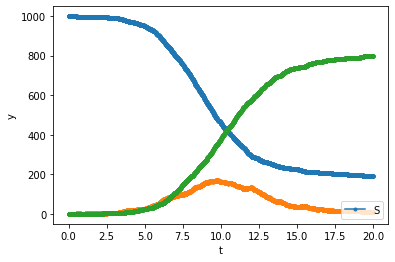

In [146]:
plt.figure() 
plt.plot(h, S, '.-')
plt.plot(h, I, '.-')
plt.plot(h, R, '.-')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(["S"], loc ="lower right")